# Lead Scoring - Case Study

In [1]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')


import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

# Display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## 1. Read and understand the data

In [2]:
xleads = pd.read_csv('Leads.csv')
# Checking first few entries
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Examine the shape of the dataset
xleads.shape

(9240, 37)

In [4]:
# Examine the unique columns in the dataset

xleads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# The summary of the dataset

xleads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
# Examination of Types of the feature variables and the null values present

xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

This dataset appears to have quite a few categorical variables for which we will need to build dummy variables. There are also a lot of null values, so we'll have to deal with them appropriately.
'Select' is as good as null, so replacing select with NaN

In [8]:
xleads = xleads.replace('Select', np.nan)

## 2. Data Cleaning and Preparation

In [9]:
# Numbers of missing value in each column

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As you can see, many columns have a significant number of missing values. These columns are obviously useless. Since our dataframe has 9000 datapoints, we'll remove the columns with more than 3000 missing values

In [10]:
# Dropping all the columns in which missing values are present > 3000 (greater than 3K)
for col in xleads.columns:
    if xleads[col].isnull().sum() > 3000:
        xleads.drop(col, 1, inplace=True)

In [11]:
# Double checking null values
xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# Dropping null in variable 'Country'
xleads.drop(['Country'], axis = 1, inplace = True)

In [13]:
# Checking the percentage of missing values in each column
round(100*(xleads.isnull().sum()/len(xleads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
# Checking the null values again

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

As notice that when you get the value counts of all the columns, there are a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't be helpful for accurate analysis.

In [15]:
xleads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [16]:
xleads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
# Dropping the null value rows present in the variable 'What matters most to you in choosing a course'

xleads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [18]:
# Examine the number of null values

xleads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column 'What is your current occupation' now has a large number of null values. You can now delete the entire row, but since we've already lost so many feature variables, we won't because it might be important in the analysis. So, for the column 'What is your current occupation,' merely remove the null rows.

In [19]:
xleads = xleads[~pd.isnull(xleads['What is your current occupation'])]

In [20]:
# Checking the numbers null value

xleads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

We may simply drop the rows in which these null values are present because the amount of null values in the columns is now fairly tiny.

In [21]:
# Dropping the null value rows in the column 'TotalVisits'

xleads = xleads[~pd.isnull(xleads['TotalVisits'])]

In [22]:
# Checking the null values again

xleads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [23]:
# Dropping the null values rows in the column 'Lead Source'

xleads = xleads[~pd.isnull(xleads['Lead Source'])]

In [24]:
# Checking the number of null values again

xleads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Data is now free of null values. Let's look at the percentage of rows we've kept.

In [25]:
print(len(xleads.index))
print(len(xleads.index)/9240)

6391
0.6916666666666667


We still have around 69% of the rows which seems good enough.

In [26]:
# look at the dataset again

xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


Clearly, the variables 'Prospect ID' and 'Lead Number' will be useless in the analysis, thus we should drop them.

In [27]:
xleads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [28]:
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


## 3. Exploratory Data Analysis (EDA)

In [29]:
xleads['Converted'].value_counts(normalize = 'True')

0    0.520419
1    0.479581
Name: Converted, dtype: float64

In [30]:
(sum(xleads['Converted'])/len(xleads['Converted'].index))*100

47.958066030355184

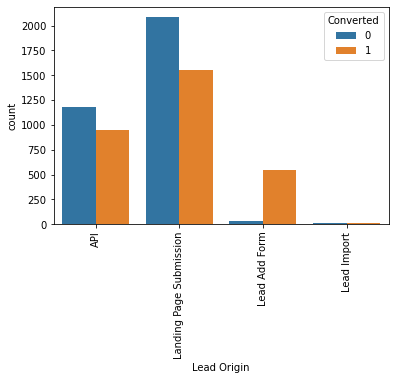

In [31]:
#Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

##### API and Landing Page Submission have more conversion rate but count of leads are also high, Lead Add Form has more conversion rate but count of leads are less than converted leads,  Lead Import are very less

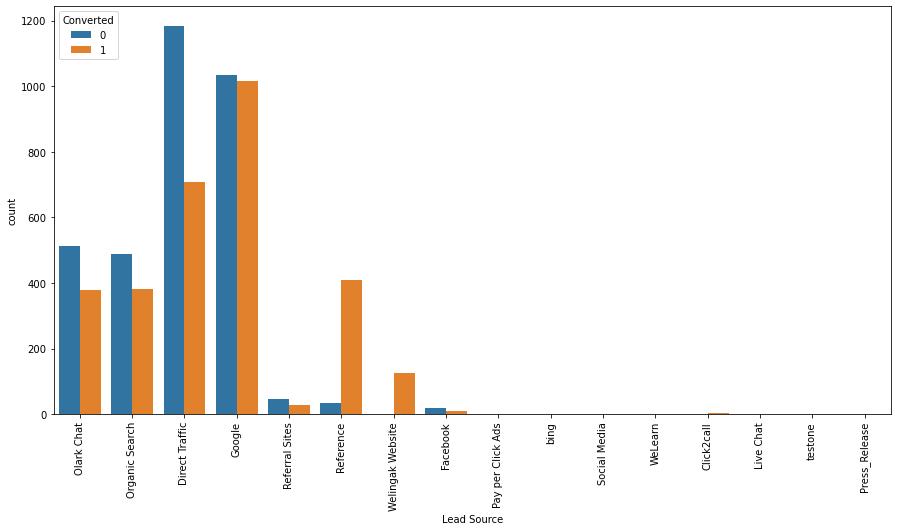

In [32]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

In [33]:
# it is observed that Google is repeating because of case 
xleads['Lead Source'] = xleads['Lead Source'].replace(['google'], 'Google')

# there are lot of lead sources that have minimal values that can be combined as one category to get better visualisation

xleads['Lead Source'] = xleads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

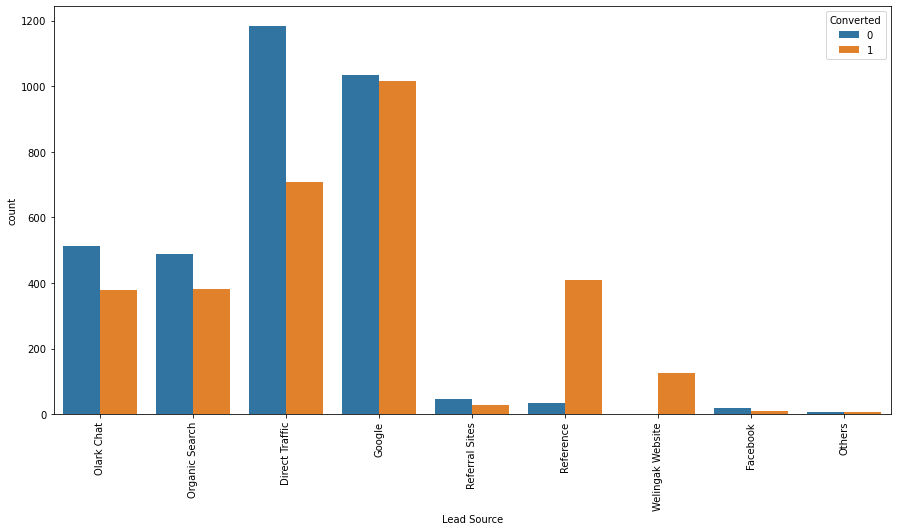

In [34]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

#### Google and Direct traffic generates highest number of leads, Conversion Rate of reference leads and leads through welingak website is high

<AxesSubplot:xlabel='TotalVisits'>

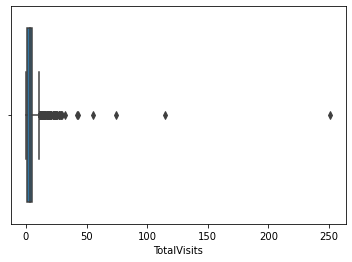

In [35]:
sns.boxplot(xleads['TotalVisits'])

In [36]:
xleads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6391.000000
mean        3.620091
std         5.042908
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [37]:
# there are outliers in data

quantile_95percent = xleads['TotalVisits'].quantile([0.05,0.95]).values
xleads['TotalVisits'][xleads['TotalVisits'] <= quantile_95percent[0]] = quantile_95percent[0]
xleads['TotalVisits'][xleads['TotalVisits'] >= quantile_95percent[1]] = quantile_95percent[1]

<AxesSubplot:xlabel='TotalVisits'>

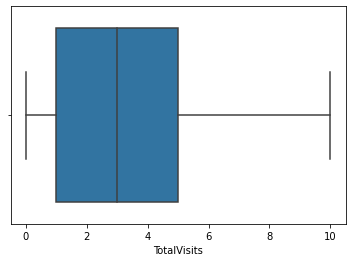

In [38]:
sns.boxplot(xleads['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

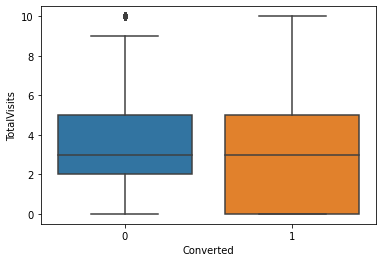

In [39]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = xleads)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

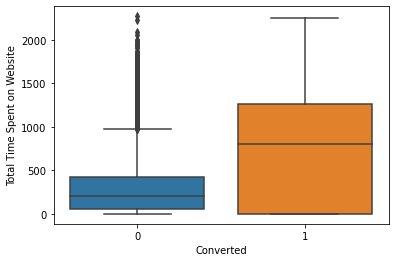

In [40]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = xleads)

<AxesSubplot:xlabel='Page Views Per Visit'>

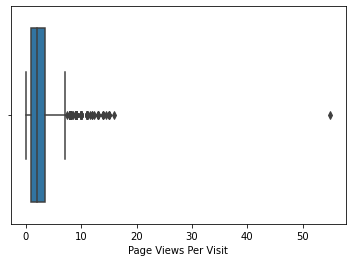

In [41]:
sns.boxplot(xleads['Page Views Per Visit'])

In [42]:
quantile_95percent = xleads['Page Views Per Visit'].quantile([0.05,0.95]).values
xleads['Page Views Per Visit'][xleads['Page Views Per Visit'] <= quantile_95percent[0]] = quantile_95percent[0]
xleads['Page Views Per Visit'][xleads['Page Views Per Visit'] >= quantile_95percent[1]] = quantile_95percent[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

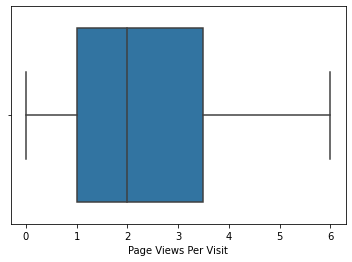

In [43]:
sns.boxplot(xleads['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

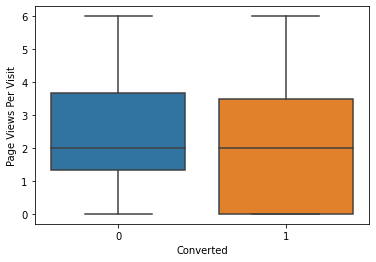

In [44]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = xleads)

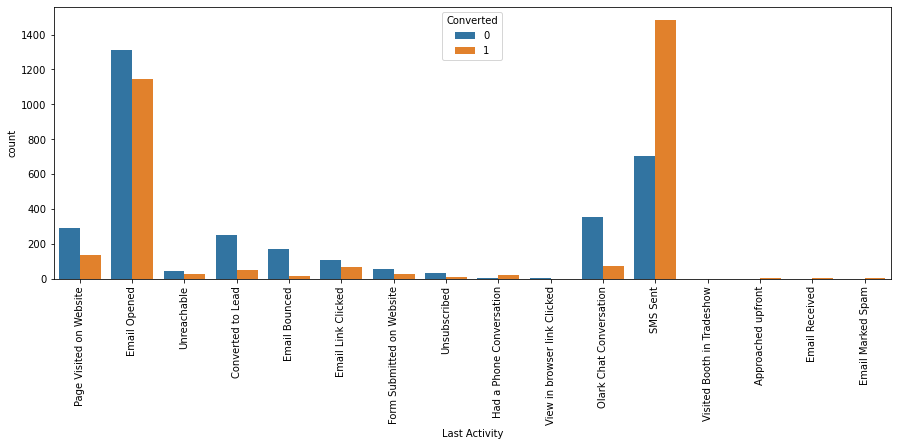

In [45]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

In [46]:
xleads['Last Activity'] = xleads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_LastActivity')

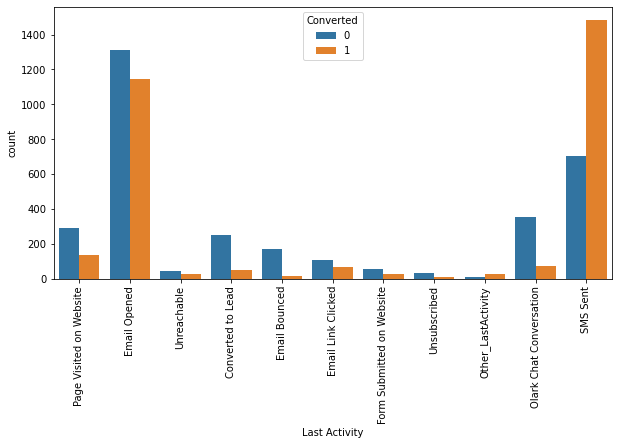

In [47]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

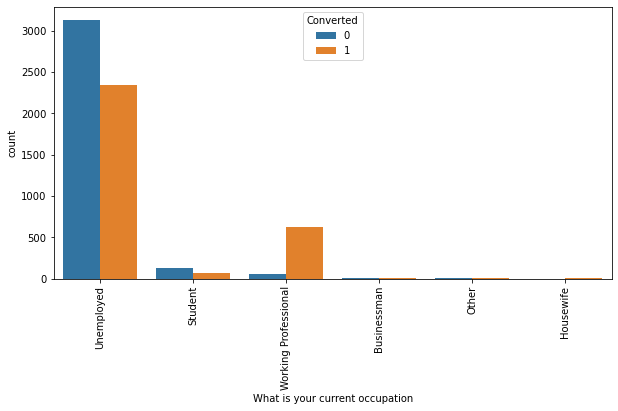

In [48]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

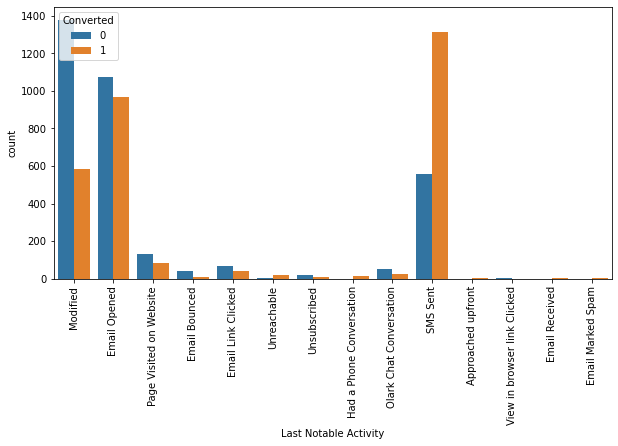

In [49]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = xleads)
xticks(rotation = 90)
plt.show()

## 4. Prepare the data for modelling

### Dummy variable creation

The categorical variables present in the dataset must be dealt with next. So, first, figure out which variables are categorical variables.

In [50]:
# Checking the columns which contains of type 'object'

cols = xleads.loc[:, xleads.dtypes == 'object']
cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(xleads[cols.columns], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([xleads, dummy], axis=1)

In [52]:
# Droping the variables for which the dummy variables have been created

xleads = xleads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                    'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [53]:
# Take a look at the dataset again

xleads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_LastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Test-Train Split

The dataset is then divided into training and testing sets.

In [54]:
# Importing the required library

from sklearn.model_selection import train_test_split

In [55]:
# Put all the feature variables in X

X = xleads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_LastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
# Put the target variable in y

y = xleads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Separate the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

A few numeric variables with varying scales are now present in the dataset. So let's start scaling these variables.

In [58]:
# Importing MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [59]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_LastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
533,0.3,0.364877,0.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
846,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7546,0.9,0.372359,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8631,0.5,0.397447,0.833333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7824,0.1,0.081866,0.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Looking at the correlations

Let's look at the relationships now. Because there are so many variables, it's better to look at the table instead of plotting a heatmap.

In [60]:
# look at the correlation table

xleads_corr = xleads.corr()
xleads_corr

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_LastActivity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.006352,0.312999,-0.067328,-0.119639,0.289106,-0.019068,-0.021000,0.022027,-0.043189,-0.033094,0.005219,0.243598,-0.023175,0.145061,-0.152299,-0.138526,-0.033053,-0.020200,-0.037085,-0.163212,0.043900,-0.087287,0.286881,-0.021067,-0.033984,0.039119,0.011691,-0.043967,-0.250549,0.302592,-0.092696,-0.053249,-0.025897,0.018431,-0.008323,0.013032,0.047030,-0.241984,-0.038856,-0.032435,0.285508,0.050529,-0.026448,-0.012009
TotalVisits,0.006352,1.000000,0.354638,0.754138,0.431096,-0.350726,-0.071146,-0.069301,0.189076,-0.413978,0.306621,-0.010453,-0.303691,0.085243,-0.162066,-0.004910,-0.064746,-0.019212,0.048968,0.013879,-0.122339,0.028828,0.204807,-0.029989,0.027071,0.009430,-0.011996,0.038407,-0.047319,0.034571,-0.018657,0.281640,-0.014451,0.003654,0.004250,0.067121,0.012006,0.035833,-0.131594,-0.012078,0.192407,-0.014374,0.011234,0.008668,0.021008
Total Time Spent on Website,0.312999,0.354638,1.000000,0.354825,0.274749,-0.249119,-0.061350,-0.060866,0.227390,-0.319636,0.079012,-0.013089,-0.214550,0.017667,-0.119400,-0.054332,-0.041910,-0.034569,0.006550,0.005764,-0.116978,0.025932,0.029820,0.074752,-0.006897,-0.011019,0.004474,0.031691,-0.031192,-0.061912,0.081497,0.154267,-0.013987,-0.031414,0.012133,0.020300,0.005003,0.024626,-0.107101,-0.009788,0.034947,0.083062,0.010343,0.001528,-0.009875
Page Views Per Visit,-0.067328,0.754138,0.354825,1.000000,0.527265,-0.395047,-0.078758,-0.075172,0.240697,-0.490895,0.312513,-0.009204,-0.341074,0.078276,-0.182576,0.013012,-0.043579,-0.033287,0.047910,-0.000382,-0.155117,0.017461,0.092491,0.026121,0.047480,0.029664,-0.011353,0.021427,-0.055098,0.052348,-0.031040,0.273241,-0.021075,-0.022232,-0.010312,0.060828,0.004433,0.019711,-0.095250,-0.046810,0.021776,0.037929,0.019186,0.030227,0.002109
Lead Origin_Landing Page Submission,-0.119639,0.431096,0.274749,0.527265,1.000000,-0.364100,-0.074996,-0.071593,0.065425,-0.463726,0.038785,-0.010126,-0.314223,-0.072641,-0.165257,0.085309,0.060048,-0.016256,0.015985,0.040042,-0.233870,0.001395,0.085204,0.005098,0.022702,0.026243,-0.001097,0.002937,-0.011496,0.029389,-0.024549,0.549542,0.001790,0.000724,-0.002502,0.038180,0.010865,-0.002878,-0.059571,-0.085492,0.050976,0.019199,-0.013709,0.024244,-0.014404
Lead Origin_Lead Add Form,0.289106,-0.350726,-0.249119,-0.395047,-0.364100,1.000000,-0.020598,-0.020977,-0.215989,-0.124221,-0.125531,0.052150,0.863011,-0.034460,0.453877,-0.028936,-0.051030,0.022553,-0.012513,-0.016707,-0.073834,-0.010298,-0.043501,0.127192,-0.012746,-0.018593,0.031667,-0.015338,-0.008405,-0.142685,

## 5. Model Building

Now it's time to start developing models. As you can see, the dataset has a large number of variables that we cannot handle. As a result, the optimal method is to use RFE to choose a small number of features from this pool of variables.

In [61]:
# Importing 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
# ImportingRFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [63]:
# look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other_LastActivity', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', F

In [64]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Other_LastActivity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Now that you have all of RFE's variables, let's utilise them to form a logistic regression model using statsmodels, since we're interested in the statistics, namely the p-values and VIFs.

In [65]:
# Selecting only th0se columns selected by RFE

X_train = X_train[col]

In [66]:
# Importing statsmodels

import statsmodels.api as sm

In [67]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.0
Date:                Tue, 15 Nov 2022   Deviance:                       4070.1
Time:                        19:48:00   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6317      0.606     -2.694      0.007      -2.819      -0.444
TotalVisits                                              1.4078      0.222      6.345      0.000       0.973       1.843
Total Time Spent on Website                              4.5068      0.189     23.895      0.000       4.137       4.876
Page Views Per Visit                                    -0.8629      0.224     -3.848      0.000      -1.302      -0.423
Lead Origin_Lead Add Form                                3.3187      1.162      2.857      0.004       1.042       5.595
Lead Source_Olark Chat                                   1.4694      0.146     10.056      0.000       1.183       1.756
Lead Source_Reference                                    0.6401      1.179      0.543      0.587      -1.671       2.952
Lead Source_Welingak Website                             2.3643      1.363      1.734      0.083      -0.308       5.036
Do Not Email_Yes                                        -1.4232      0.232     -6.125      0.000      -1.879      -0.968
Last Activity_Email Bounced                             -0.5296      0.448     -1.183      0.237      -1.407       0.348
Last Activity_Other_LastActivity                         0.9282      0.563      1.647      0.099      -0.176       2.033
Last Activity_SMS Sent                                   1.0740      0.158      6.788      0.000       0.764       1.384
Last Activity_Unsubscribed                               1.2066      0.620      1.946      0.052      -0.009       2.422
What is your current occupation_Housewife               21.9560    2.1e+04      0.001      0.999   -4.11e+04    4.11e+04
What is your current occupation_Student                 -0.4967      0.608     -0.817      0.414      -1.688       0.695
What is your current occupation_Unemployed              -0.4365      0.572     -0.764      0.445      -1.557       0.684
What is your current occupation_Working Professional     2.0148      0.598      3.368      0.001       0.842       3.187
Last Notable Activity_Email Opened                       0.0253      0.174      0.146      0.884      -0.315       0.366
Last Notable Activity_Had a Phone Conversation          22.0732   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Last Notable Activity_Modified                          -0.7341      0.154     -4.770      0.000      -1.036      -0.432
Last Notable Activity_Olark Chat Conversation           -1.1243      0.412     -2.731      0.006      -1.931      -0.317
Last Notable Activity_Page Visited on Website           -0.6050      0.277     -2.188      0.029      -1.147      -0.063
Last Notable Activity_Unreachable                        3

There are a number of variables with p-values greater than 0.05. We'll have to look after them. But first, let's examine the VIFs.

In [68]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,67.73
5,Lead Source_Reference,52.00
14,What is your current occupation_Unemployed,19.43
6,Lead Source_Welingak Website,16.36
2,Page Views Per Visit,8.18
0,TotalVisits,6.25
16,Last Notable Activity_Email Opened,6.19
10,Last Activity_SMS Sent,5.43
18,Last Notable Activity_Modified,4.45
15,What is your current occupation_Working Profes...,3.46


Except for three variables, VIFs appear to be in a reasonable range.

First, we'll remove the variable 'Last Notable Activity_View in browser link Clicked' which has a high p-value

In [70]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [71]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.6
Date:                Tue, 15 Nov 2022   Deviance:                       4081.1
Time:                        19:48:00   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5865      0.605     -2.622      0.009      -2.772      -0.401
TotalVisits                                              1.3948      0.221      6.307      0.000       0.961       1.828
Total Time Spent on Website                              4.4766      0.188     23.819      0.000       4.108       4.845
Page Views Per Visit                                    -0.9072      0.224     -4.056      0.000      -1.346      -0.469
Lead Source_Olark Chat                                   1.4279      0.145      9.834      0.000       1.143       1.712
Lead Source_Reference                                    3.9161      0.262     14.924      0.000       3.402       4.430
Lead Source_Welingak Website                             5.6401      0.732      7.700      0.000       4.205       7.076
Do Not Email_Yes                                        -1.4257      0.232     -6.144      0.000      -1.880      -0.971
Last Activity_Email Bounced                             -0.5366      0.447     -1.200      0.230      -1.413       0.340
Last Activity_Other_LastActivity                         0.9266      0.563      1.647      0.100      -0.176       2.030
Last Activity_SMS Sent                                   1.0728      0.158      6.791      0.000       0.763       1.382
Last Activity_Unsubscribed                               1.2051      0.619      1.948      0.051      -0.007       2.418
What is your current occupation_Housewife               21.9536    2.1e+04      0.001      0.999   -4.11e+04    4.12e+04
What is your current occupation_Student                 -0.5011      0.608     -0.825      0.410      -1.692       0.690
What is your current occupation_Unemployed              -0.4350      0.571     -0.762      0.446      -1.554       0.684
What is your current occupation_Working Professional     2.0091      0.598      3.361      0.001       0.838       3.181
Last Notable Activity_Email Opened                       0.0250      0.174      0.144      0.885      -0.315       0.365
Last Notable Activity_Had a Phone Conversation          22.0722   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Last Notable Activity_Modified                          -0.7392      0.154     -4.811      0.000      -1.040      -0.438
Last Notable Activity_Olark Chat Conversation           -1.1261      0.411     -2.740      0.006      -1.932      -0.321
Last Notable Activity_Page Visited on Website           -0.6088      0.276     -2.206      0.027      -1.150      -0.068
Last Notable Activity_Unreachable                        3.3110      1.085      3.053      0.002       1.185       5.437
==========================================================

In [72]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,19.38
2,Page Views Per Visit,8.15
0,TotalVisits,6.25
15,Last Notable Activity_Email Opened,6.19
9,Last Activity_SMS Sent,5.43
17,Last Notable Activity_Modified,4.45
14,What is your current occupation_Working Profes...,3.46
1,Total Time Spent on Website,2.43
3,Lead Source_Olark Chat,1.98
6,Do Not Email_Yes,1.82


###### dropping What is your current occupation_Unemployed

In [73]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [74]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.9
Date:                Tue, 15 Nov 2022   Deviance:                       4081.7
Time:                        19:48:01   Pearson chi2:                 4.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0223      0.198    -10.224      0.000      -2.410      -1.635
TotalVisits                                              1.4022      0.221      6.345      0.000       0.969       1.835
Total Time Spent on Website                              4.4802      0.188     23.843      0.000       4.112       4.848
Page Views Per Visit                                    -0.9111      0.224     -4.074      0.000      -1.349      -0.473
Lead Source_Olark Chat                                   1.4293      0.145      9.845      0.000       1.145       1.714
Lead Source_Reference                                    3.9198      0.262     14.938      0.000       3.406       4.434
Lead Source_Welingak Website                             5.6405      0.732      7.701      0.000       4.205       7.076
Do Not Email_Yes                                        -1.4263      0.232     -6.147      0.000      -1.881      -0.972
Last Activity_Email Bounced                             -0.5385      0.447     -1.204      0.229      -1.415       0.338
Last Activity_Other_LastActivity                         0.9228      0.563      1.640      0.101      -0.180       2.026
Last Activity_SMS Sent                                   1.0717      0.158      6.787      0.000       0.762       1.381
Last Activity_Unsubscribed                               1.2041      0.619      1.946      0.052      -0.009       2.417
What is your current occupation_Housewife               22.3847    2.1e+04      0.001      0.999   -4.11e+04    4.12e+04
What is your current occupation_Student                 -0.0686      0.216     -0.318      0.751      -0.492       0.355
What is your current occupation_Working Professional     2.4420      0.185     13.201      0.000       2.079       2.805
Last Notable Activity_Email Opened                       0.0265      0.173      0.153      0.879      -0.313       0.366
Last Notable Activity_Had a Phone Conversation          22.0744   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Last Notable Activity_Modified                          -0.7363      0.154     -4.795      0.000      -1.037      -0.435
Last Notable Activity_Olark Chat Conversation           -1.1279      0.411     -2.744      0.006      -1.934      -0.322
Last Notable Activity_Page Visited on Website           -0.6124      0.276     -2.219      0.027      -1.153      -0.071
Last Notable Activity_Unreachable                        3.3154      1.084      3.059      0.002       1.191       5.440
========================================================================================================================
"""

In [75]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.49
0,TotalVisits,6.19
14,Last Notable Activity_Email Opened,2.75
9,Last Activity_SMS Sent,2.68
1,Total Time Spent on Website,2.35
16,Last Notable Activity_Modified,1.93
6,Do Not Email_Yes,1.81
7,Last Activity_Email Bounced,1.66
3,Lead Source_Olark Chat,1.64
4,Lead Source_Reference,1.46


In [76]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [77]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.3
Date:                Tue, 15 Nov 2022   Deviance:                       4098.5
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2454      0.190    -11.802      0.000      -2.618      -1.873
TotalVisits                                              0.8729      0.178      4.915      0.000       0.525       1.221
Total Time Spent on Website                              4.4654      0.188     23.811      0.000       4.098       4.833
Lead Source_Olark Chat                                   1.6538      0.135     12.230      0.000       1.389       1.919
Lead Source_Reference                                    4.1511      0.257     16.166      0.000       3.648       4.654
Lead Source_Welingak Website                             5.8719      0.730      8.043      0.000       4.441       7.303
Do Not Email_Yes                                        -1.4473      0.231     -6.256      0.000      -1.901      -0.994
Last Activity_Email Bounced                             -0.4587      0.443     -1.035      0.301      -1.328       0.410
Last Activity_Other_LastActivity                         0.8977      0.564      1.592      0.111      -0.207       2.003
Last Activity_SMS Sent                                   1.0375      0.157      6.602      0.000       0.730       1.346
Last Activity_Unsubscribed                               1.1226      0.626      1.795      0.073      -0.103       2.349
What is your current occupation_Housewife               22.3449   2.12e+04      0.001      0.999   -4.14e+04    4.15e+04
What is your current occupation_Student                 -0.0576      0.216     -0.267      0.790      -0.481       0.366
What is your current occupation_Working Professional     2.4250      0.184     13.153      0.000       2.064       2.786
Last Notable Activity_Email Opened                       0.0178      0.173      0.103      0.918      -0.321       0.357
Last Notable Activity_Had a Phone Conversation          22.0266   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
Last Notable Activity_Modified                          -0.7280      0.153     -4.755      0.000      -1.028      -0.428
Last Notable Activity_Olark Chat Conversation           -1.0739      0.404     -2.659      0.008      -1.865      -0.282
Last Notable Activity_Page Visited on Website           -0.4525      0.271     -1.670      0.095      -0.984       0.079
Last Notable Activity_Unreachable                        3.2704      1.084      3.016      0.003       1.145       5.396
========================================================================================================================
"""

In [78]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.42
13,Last Notable Activity_Email Opened,2.37
1,Total Time Spent on Website,2.34
8,Last Activity_SMS Sent,2.30
5,Do Not Email_Yes,1.81
15,Last Notable Activity_Modified,1.71
6,Last Activity_Email Bounced,1.66
2,Lead Source_Olark Chat,1.50
7,Last Activity_Other_LastActivity,1.44
14,Last Notable Activity_Had a Phone Conversation,1.43


In [79]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.3
Date:                Tue, 15 Nov 2022   Deviance:                       4098.5
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2454      0.190    -11.802      0.000      -2.618      -1.873
TotalVisits                                              0.8729      0.178      4.915      0.000       0.525       1.221
Total Time Spent on Website                              4.4654      0.188     23.811      0.000       4.098       4.833
Lead Source_Olark Chat                                   1.6538      0.135     12.230      0.000       1.389       1.919
Lead Source_Reference                                    4.1511      0.257     16.166      0.000       3.648       4.654
Lead Source_Welingak Website                             5.8719      0.730      8.043      0.000       4.441       7.303
Do Not Email_Yes                                        -1.4473      0.231     -6.256      0.000      -1.901      -0.994
Last Activity_Email Bounced                             -0.4587      0.443     -1.035      0.301      -1.328       0.410
Last Activity_Other_LastActivity                         0.8977      0.564      1.592      0.111      -0.207       2.003
Last Activity_SMS Sent                                   1.0375      0.157      6.602      0.000       0.730       1.346
Last Activity_Unsubscribed                               1.1226      0.626      1.795      0.073      -0.103       2.349
What is your current occupation_Housewife               22.3449   2.12e+04      0.001      0.999   -4.14e+04    4.15e+04
What is your current occupation_Student                 -0.0576      0.216     -0.267      0.790      -0.481       0.366
What is your current occupation_Working Professional     2.4250      0.184     13.153      0.000       2.064       2.786
Last Notable Activity_Email Opened                       0.0178      0.173      0.103      0.918      -0.321       0.357
Last Notable Activity_Had a Phone Conversation          22.0266   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
Last Notable Activity_Modified                          -0.7280      0.153     -4.755      0.000      -1.028      -0.428
Last Notable Activity_Olark Chat Conversation           -1.0739      0.404     -2.659      0.008      -1.865      -0.282
Last Notable Activity_Page Visited on Website           -0.4525      0.271     -1.670      0.095      -0.984       0.079
Last Notable Activity_Unreachable                        3.2704      1.084      3.016      0.003       1.145       5.396
========================================================================================================================
"""

All VIFs are under 5. Let us remove variables with high P value.

In [80]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [81]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4454
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.4
Date:                Tue, 15 Nov 2022   Deviance:                       4102.8
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2388      0.190    -11.785      0.000      -2.611      -1.866
TotalVisits                                              0.8713      0.178      4.906      0.000       0.523       1.219
Total Time Spent on Website                              4.4713      0.187     23.853      0.000       4.104       4.839
Lead Source_Olark Chat                                   1.6520      0.135     12.221      0.000       1.387       1.917
Lead Source_Reference                                    4.1565      0.257     16.196      0.000       3.654       4.660
Lead Source_Welingak Website                             5.8711      0.730      8.042      0.000       4.440       7.302
Do Not Email_Yes                                        -1.4482      0.231     -6.259      0.000      -1.902      -0.995
Last Activity_Email Bounced                             -0.4644      0.443     -1.048      0.295      -1.333       0.404
Last Activity_Other_LastActivity                         0.8920      0.564      1.582      0.114      -0.213       1.997
Last Activity_SMS Sent                                   1.0307      0.157      6.568      0.000       0.723       1.338
Last Activity_Unsubscribed                               1.1167      0.626      1.785      0.074      -0.110       2.343
What is your current occupation_Student                 -0.0602      0.216     -0.279      0.781      -0.484       0.363
What is your current occupation_Working Professional     2.4226      0.184     13.140      0.000       2.061       2.784
Last Notable Activity_Email Opened                       0.0128      0.173      0.074      0.941      -0.326       0.351
Last Notable Activity_Had a Phone Conversation          22.0257   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
Last Notable Activity_Modified                          -0.7296      0.153     -4.770      0.000      -1.029      -0.430
Last Notable Activity_Olark Chat Conversation           -1.0803      0.404     -2.675      0.007      -1.872      -0.289
Last Notable Activity_Page Visited on Website           -0.4593      0.271     -1.695      0.090      -0.990       0.072
Last Notable Activity_Unreachable                        3.2638      1.084      3.010      0.003       1.138       5.389
========================================================================================================================
"""

In [82]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [83]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4455
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.8
Date:                Tue, 15 Nov 2022   Deviance:                       4109.6
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1999      0.189    -11.650      0.000      -2.570      -1.830
TotalVisits                                              0.8795      0.177      4.962      0.000       0.532       1.227
Total Time Spent on Website                              4.4609      0.187     23.818      0.000       4.094       4.828
Lead Source_Olark Chat                                   1.6482      0.135     12.201      0.000       1.383       1.913
Lead Source_Reference                                    4.1545      0.257     16.189      0.000       3.652       4.657
Lead Source_Welingak Website                             5.8730      0.730      8.046      0.000       4.442       7.304
Do Not Email_Yes                                        -1.4515      0.231     -6.272      0.000      -1.905      -0.998
Last Activity_Email Bounced                             -0.4761      0.443     -1.074      0.283      -1.345       0.393
Last Activity_Other_LastActivity                         1.5354      0.497      3.092      0.002       0.562       2.509
Last Activity_SMS Sent                                   0.9984      0.156      6.393      0.000       0.692       1.304
Last Activity_Unsubscribed                               1.0907      0.626      1.742      0.082      -0.137       2.318
What is your current occupation_Student                 -0.0598      0.216     -0.277      0.782      -0.483       0.364
What is your current occupation_Working Professional     2.4164      0.184     13.111      0.000       2.055       2.778
Last Notable Activity_Email Opened                      -0.0256      0.172     -0.149      0.882      -0.362       0.311
Last Notable Activity_Modified                          -0.7706      0.152     -5.076      0.000      -1.068      -0.473
Last Notable Activity_Olark Chat Conversation           -1.1168      0.403     -2.768      0.006      -1.908      -0.326
Last Notable Activity_Page Visited on Website           -0.4996      0.270     -1.849      0.064      -1.029       0.030
Last Notable Activity_Unreachable                        3.2236      1.084      2.973      0.003       1.099       5.349
========================================================================================================================
"""

In [84]:
X_train.drop('Last Notable Activity_Email Opened', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4456
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.8
Date:                Tue, 15 Nov 2022   Deviance:                       4109.6
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2220      0.117    -18.986      0.000      -2.451      -1.993
TotalVisits                                              0.8796      0.177      4.963      0.000       0.532       1.227
Total Time Spent on Website                              4.4605      0.187     23.819      0.000       4.093       4.828
Lead Source_Olark Chat                                   1.6490      0.135     12.216      0.000       1.384       1.914
Lead Source_Reference                                    4.1543      0.257     16.187      0.000       3.651       4.657
Lead Source_Welingak Website                             5.8716      0.730      8.044      0.000       4.441       7.302
Do Not Email_Yes                                        -1.4496      0.231     -6.274      0.000      -1.902      -0.997
Last Activity_Email Bounced                             -0.4650      0.437     -1.064      0.287      -1.321       0.391
Last Activity_Other_LastActivity                         1.5458      0.492      3.145      0.002       0.582       2.509
Last Activity_SMS Sent                                   1.0177      0.087     11.672      0.000       0.847       1.189
Last Activity_Unsubscribed                               1.1067      0.617      1.795      0.073      -0.102       2.315
What is your current occupation_Student                 -0.0601      0.216     -0.278      0.781      -0.483       0.363
What is your current occupation_Working Professional     2.4164      0.184     13.111      0.000       2.055       2.778
Last Notable Activity_Modified                          -0.7525      0.091     -8.263      0.000      -0.931      -0.574
Last Notable Activity_Olark Chat Conversation           -1.0951      0.376     -2.912      0.004      -1.832      -0.358
Last Notable Activity_Page Visited on Website           -0.4777      0.227     -2.106      0.035      -0.922      -0.033
Last Notable Activity_Unreachable                        3.2457      1.074      3.022      0.003       1.140       5.351
========================================================================================================================
"""

In [86]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [87]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.8
Date:                Tue, 15 Nov 2022   Deviance:                       4109.7
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2248      0.117    -19.078      0.000      -2.453      -1.996
TotalVisits                                              0.8808      0.177      4.971      0.000       0.533       1.228
Total Time Spent on Website                              4.4600      0.187     23.817      0.000       4.093       4.827
Lead Source_Olark Chat                                   1.6476      0.135     12.216      0.000       1.383       1.912
Lead Source_Reference                                    4.1533      0.257     16.186      0.000       3.650       4.656
Lead Source_Welingak Website                             5.8732      0.730      8.046      0.000       4.443       7.304
Do Not Email_Yes                                        -1.4488      0.231     -6.272      0.000      -1.901      -0.996
Last Activity_Email Bounced                             -0.4673      0.437     -1.070      0.285      -1.323       0.389
Last Activity_Other_LastActivity                         1.5479      0.491      3.149      0.002       0.585       2.511
Last Activity_SMS Sent                                   1.0193      0.087     11.715      0.000       0.849       1.190
Last Activity_Unsubscribed                               1.1084      0.616      1.798      0.072      -0.100       2.317
What is your current occupation_Working Professional     2.4185      0.184     13.133      0.000       2.058       2.779
Last Notable Activity_Modified                          -0.7520      0.091     -8.260      0.000      -0.930      -0.574
Last Notable Activity_Olark Chat Conversation           -1.0993      0.376     -2.923      0.003      -1.836      -0.362
Last Notable Activity_Page Visited on Website           -0.4779      0.227     -2.106      0.035      -0.923      -0.033
Last Notable Activity_Unreachable                        3.2482      1.074      3.024      0.002       1.143       5.353
========================================================================================================================
"""

In [88]:
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [89]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.4
Date:                Tue, 15 Nov 2022   Deviance:                       4110.9
Time:                        19:48:01   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2326      0.116    -19.172      0.000      -2.461      -2.004
TotalVisits                                              0.8908      0.177      5.034      0.000       0.544       1.238
Total Time Spent on Website                              4.4560      0.187     23.813      0.000       4.089       4.823
Lead Source_Olark Chat                                   1.6507      0.135     12.238      0.000       1.386       1.915
Lead Source_Reference                                    4.1664      0.257     16.243      0.000       3.664       4.669
Lead Source_Welingak Website                             5.8770      0.729      8.064      0.000       4.449       7.305
Do Not Email_Yes                                        -1.5688      0.205     -7.662      0.000      -1.970      -1.168
Last Activity_Other_LastActivity                         1.5544      0.491      3.163      0.002       0.591       2.517
Last Activity_SMS Sent                                   1.0323      0.086     11.973      0.000       0.863       1.201
Last Activity_Unsubscribed                               1.2195      0.607      2.008      0.045       0.029       2.410
What is your current occupation_Working Professional     2.4093      0.183     13.139      0.000       2.050       2.769
Last Notable Activity_Modified                          -0.7557      0.091     -8.308      0.000      -0.934      -0.577
Last Notable Activity_Olark Chat Conversation           -1.0934      0.376     -2.907      0.004      -1.831      -0.356
Last Notable Activity_Page Visited on Website           -0.4635      0.227     -2.045      0.041      -0.908      -0.019
Last Notable Activity_Unreachable                        3.2525      1.074      3.028      0.002       1.147       5.358
========================================================================================================================
"""

###### Lead Source_Welingak Website, Total Time Spent on Website, Lead Source_Reference are the three varibles with high co-efficients and hence are important in influencing the Lead converison

In [90]:
# Making VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.31
1,Total Time Spent on Website,2.09
7,Last Activity_SMS Sent,1.58
10,Last Notable Activity_Modified,1.33
9,What is your current occupation_Working Profes...,1.21
3,Lead Source_Reference,1.19
2,Lead Source_Olark Chat,1.17
5,Do Not Email_Yes,1.15
12,Last Notable Activity_Page Visited on Website,1.15
8,Last Activity_Unsubscribed,1.07


## 6. Model Evaluation

For all of the variables, the p-values and VIFs appear to be adequate. So, utilising this final set of features, let's make some predictions.

In [91]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

533     0.887935
846     0.873675
7546    0.779148
8631    0.564762
7824    0.073484
4986    0.734066
5542    0.417464
1719    0.264806
4860    0.989793
8609    0.245680
dtype: float64

In [92]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88793505, 0.87367467, 0.77914785, 0.56476221, 0.07348396,
       0.73406566, 0.41746421, 0.26480614, 0.98979304, 0.24567972])

#### Creating a dataframe that contains the actual conversion flag as well as the projected probability

In [93]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.887935
1,1,0.873675
2,1,0.779148
3,0,0.564762
4,0,0.073484


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [94]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.887935,1
1,1,0.873675,1
2,1,0.779148,1
3,0,0.564762,1
4,0,0.073484,0


It's time to evaluate the model now that you have the probabilities and have used them to make conversion predictions.

In [95]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

### Evaluation metrics

In [96]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1962  387]
 [ 558 1566]]


In [97]:
# Predicted     not_churn    churn
# Actual
# not_churn        1962      387
# churn            558       1566  

In [98]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7887323943661971


In [99]:
# Evaluating the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Calculating the sensitivity

TP/(TP+FN)

0.7372881355932204

In [101]:
# Calculating the specificity

TN/(TN+FP)

0.8352490421455939

### Model accuracy

0.5 was chosen at random to verify the model's performance. However, you must optimise the threshold in order to achieve good results. Let's start by plotting a ROC curve to check what AUC we receive.

In [102]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [104]:
# Importing matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

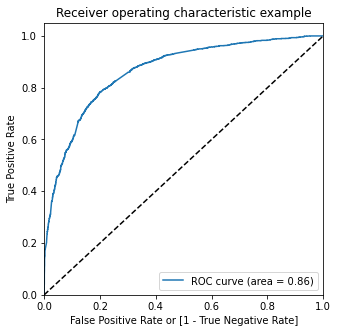

In [105]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding the Optimal Cutoff: Optimizing prediction accuracy

The ROC's area under the curve is 0.86, which is excellent. So it appears that we have a good model. To select the best cutoff point, consider the sensitivity and specificity tradeoff.

In [106]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.887935,1,1,1,1,1,1,1,1,1,1,0
1,1,0.873675,1,1,1,1,1,1,1,1,1,1,0
2,1,0.779148,1,1,1,1,1,1,1,1,1,0,0
3,0,0.564762,1,1,1,1,1,1,1,0,0,0,0
4,0,0.073484,0,1,0,0,0,0,0,0,0,0,0


In [107]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.572099  0.983522  0.200085
0.2   0.2  0.686117  0.949623  0.447850
0.3   0.3  0.762799  0.889360  0.648361
0.4   0.4  0.786497  0.801789  0.772669
0.5   0.5  0.788732  0.737288  0.835249
0.6   0.6  0.779566  0.670433  0.878246
0.7   0.7  0.748491  0.557439  0.921243
0.8   0.8  0.714509  0.447269  0.956152
0.9   0.9  0.650123  0.281073  0.983823


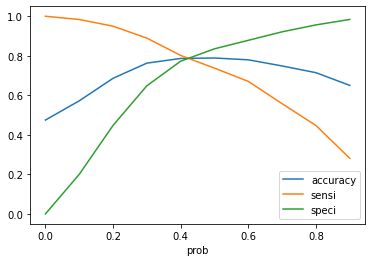

In [108]:
# ploting it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see, the ideal values of the three measures are found around 0.42. So let's go with 0.42 as our new cutoff.

### Model validation: Making Predictions on the Test Set

Testing the prediction accuracy with optimum cutoff of 0.42

In [109]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [110]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Other_LastActivity,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,0.4,0.485915,0.666667,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4301,0.1,0.144366,0.166667,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5904,0.3,0.174296,0.500000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6881,0.9,0.069102,0.750000,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5195,0.4,0.571303,0.666667,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [111]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Other_LastActivity,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
2938,1.0,0.4,0.485915,0.666667,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4301,1.0,0.1,0.144366,0.166667,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5904,1.0,0.3,0.174296,0.500000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6881,1.0,0.9,0.069102,0.750000,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5195,1.0,0.4,0.571303,0.666667,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,1.0,0.7,0.426937,0.388333,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7454,1.0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8201,1.0,0.2,0.557218,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7979,1.0,0.3,0.451144,0.500000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [112]:
# Droping the required columns from X_test as well
X_test = X_test[X_train.columns]

In [113]:
# Making predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

2938    0.976582
4301    0.450458
5904    0.038382
6881    0.030846
5195    0.845770
7243    0.607993
901     0.767674
3943    0.207921
4971    0.917464
1792    0.288096
dtype: float64

In [114]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.976582
1,0,0.450458
2,0,0.038382
3,0,0.030846
4,1,0.845770


In [115]:
# Making predictions on the test set using 0.45 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.976582,1
1,0,0.450458,1
2,0,0.038382,0
3,0,0.030846,0
4,1,0.845770,1


In [116]:
# Examination of the overall accuracy - Testing data
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7898852971845672

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.887935,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.873675,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.779148,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.564762,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.073484,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
# Checking the accuracy - training data with optimum cutoff
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7902973395931142

In [119]:
# Creating the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  497],
       [ 441, 1683]], dtype=int64)

In [120]:
# Evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Calculating Sensitivity

TP/(TP+FN)

0.7923728813559322

In [122]:
# Calculating Specificity

TN/(TN+FP)

0.7884206045125586

This cutoff appears to be acceptable!

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[771, 206],
       [197, 744]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Calculatting sensitivity
TP / float(TP+FN)

0.7906482465462275

In [126]:
# Calculatting specificity
TN / float(TN+FP)

0.789150460593654

### Q1: Top three variables

In [127]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.4
Date:                Tue, 15 Nov 2022   Deviance:                       4110.9
Time:                        19:48:02   Pearson chi2:                 4.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2326      0.116    -19.172      0.000      -2.461      -2.004
TotalVisits                                              0.8908      0.177      5.034      0.000       0.544       1.238
Total Time Spent on Website                              4.4560      0.187     23.813      0.000       4.089       4.823
Lead Source_Olark Chat                                   1.6507      0.135     12.238      0.000       1.386       1.915
Lead Source_Reference                                    4.1664      0.257     16.243      0.000       3.664       4.669
Lead Source_Welingak Website                             5.8770      0.729      8.064      0.000       4.449       7.305
Do Not Email_Yes                                        -1.5688      0.205     -7.662      0.000      -1.970      -1.168
Last Activity_Other_LastActivity                         1.5544      0.491      3.163      0.002       0.591       2.517
Last Activity_SMS Sent                                   1.0323      0.086     11.973      0.000       0.863       1.201
Last Activity_Unsubscribed                               1.2195      0.607      2.008      0.045       0.029       2.410
What is your current occupation_Working Professional     2.4093      0.183     13.139      0.000       2.050       2.769
Last Notable Activity_Modified                          -0.7557      0.091     -8.308      0.000      -0.934      -0.577
Last Notable Activity_Olark Chat Conversation           -1.0934      0.376     -2.907      0.004      -1.831      -0.356
Last Notable Activity_Page Visited on Website           -0.4635      0.227     -2.045      0.041      -0.908      -0.019
Last Notable Activity_Unreachable                        3.2525      1.074      3.028      0.002       1.147       5.358
========================================================================================================================
"""

top three variables based on coefficients and also from exploratory data analysis are:
1. Lead Source
2. Total Time Spent on Website
3. What is your current occupation

### Q2. Top three categorical/dummy variables

The top three categorical/dummy variables based on coefficients are:
1. Lead Source_Welingak Website
2. Lead Source_Reference
3. What is your current occupation_Working Professional

### Q3. High False positives

We need to want to make phone calls to as much of such people as possible by the interns, so, we can have high false positives. To address, we can lower the cut-off as shown below (to increase false positives)

In [128]:
y_pred_final['final_predicted_Q3'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [129]:
#Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted_Q3)

0.6976016684045881

In [130]:
confusionQ3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted_Q3 )
confusionQ3

array([[444, 533],
       [ 47, 894]], dtype=int64)

In [131]:
TPQ3 = confusionQ3[1,1] # true positive 
TNQ3 = confusionQ3[0,0] # true negatives
FPQ3 = confusionQ3[0,1] # false positives
FNQ3 = confusionQ3[1,0] # false negatives

In [132]:
FPQ3

533

We can see an increase in the number of false positives from 206 to 533 which has more than doubled. So we can decrease the cut-off to 0.2 and get the interns calling all the contacts with positives

### Q4 minimize the rate of useless phone calls (to have low FP)                                                                               

Do not call true negatives. As we increase the cut-off to 0.8, we saw that false negatives have also reduced. If its absolutely necessary, we can call these false negatives

In [133]:
y_pred_final['final_predicted_Q4'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [134]:
#Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted_Q4)

0.7064650677789364

In [135]:
confusionQ4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted_Q4 )
confusionQ4

array([[930,  47],
       [516, 425]], dtype=int64)

In [136]:
TPQ4 = confusionQ4[1,1] # true positive 
TNQ4 = confusionQ4[0,0] # true negatives
FPQ4 = confusionQ4[0,1] # false positives
FNQ4 = confusionQ4[1,0] # false negatives

In [137]:
FPQ4

47

We can see an decrease in the number of false positives from 533 (in Q3) to 47 which was very less. So we can increase the cut-offs and save the resources with minimum callings.

## Summary
We built a model with 78.9 % accuracy which is decent. We found that the three important features to be considered are: Lead Source, Total Time Spent on Website, Current occupation.

Further with ample resources, more callings can be made by decreasing the prediction cutoff, and with minimum resources some unnecessary calls can be avoided by increasing the cutoffs.


#   --------------------------Code Ends Here---------------------------------